In [154]:
# Install necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [155]:
# Helper functions

# Calculates a predictor insight graph table
def create_pig_table(df, target, variable):
    groups = df[[target, variable]].groupby(variable)
    pig_table = groups[target].agg(Incidence='mean').reset_index()
    return pig_table

# Returns a dictionary with pig tables for each variable in the variables input
def create_all_pig(df, target, variables):
    tables = {}
    for v in variables:
        pig_table = create_pig_table(df, target, v)
        tables[v] = pig_table
    return tables

# Returns the number of optimal features `nop` and the accuracy score of the best model with those feature `best_acc`
# Returns `train_acc` and `test_acc` which are dictionaries with the number of vars and corresponding accuracy
# Arguments are the data frame `df`, list of independent variables `vars`, target variable `target` and max number of variables to select `max_n`
def feature_selection(df, vars, target, max_n=None):
    train_acc = {}
    test_acc = {}
    X = df.loc[:, vars]
    y = df.loc[:, target]
    best_acc = 0
    nop = 0
    if max_n is None or max_n > len(vars):
        max_n = len(vars)
    for n in range(1, max_n+1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
        reg = LinearRegression()
        # Using Recursive Feature Elimination (RFE)
        rfe = RFE(reg, n_features_to_select=n, step=1)

        # Transform features so that they only have the best vars determined by RFE
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)

        # Fit our model with the selected vars and training data
        reg.fit(X_train_rfe, y_train)
        train_acc[n] = reg.score(X_train_rfe, y_train)
        acc = reg.score(X_test_rfe, y_test)
        test_acc[n] = acc
        if acc > best_acc:
            best_acc = acc
            nop = n
    return nop, best_acc, train_acc, test_acc

# Takes two dictionaries as arguments, one for training and one for test that have the number of vars with corresponding accuracy
# Plots training and test accuracy based on the number of vars in the model
def plt_vars_and_accuracy(training_dict, test_dict, xticks=None):
    if list(training_dict.keys()) != list(test_dict.keys()):
        print('The keys in the test and training dictionaries don\'t match up')
        return
    num_vars = list(training_dict.keys())
    train_acc = list(training_dict.values())
    test_acc = list(test_dict.values())

    plt.plot(num_vars, train_acc, label='Training Accuracy')
    plt.plot(num_vars, test_acc, label='Test Accuracy')
    plt.title('Training and Test Accuracy Based on Number of Variables in Model')
    plt.legend()
    if xticks is not None:
        plt.xticks(xticks)
    plt.show()

In [156]:
# Import data
df = pd.read_csv('./input/HDI.csv')
df.head()

,Unnamed: 0,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,0,1,Norway,1.0,0.949,81.7,12.7,67614.0,5.0,0.0,...,5.4,3.3,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,...,8.0,4.3,0.921,1.9,0.921,17.7,0.753,6.0,1.4,34.9
2,2,3,Switzerland,2.0,0.939,83.1,13.4,56364.0,7.0,0.0,...,8.4,3.8,0.934,5.7,0.840,15.7,0.806,4.9,1.2,31.6
3,3,4,Germany,4.0,0.926,81.1,13.2,45000.0,13.0,0.0,...,7.0,3.7,0.905,2.6,0.891,14.8,0.787,4.6,1.1,30.1
4,4,5,Denmark,5.0,0.925,80.4,12.7,44519.0,13.0,2.0,...,7.0,3.8,0.894,3.0,0.896,14.3,0.789,4.5,1.0,29.1


In [157]:
df.describe()


,Unnamed: 0,Id,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
count,195.000000,195.000000,188.000000,188.000000,190.000000,188.000000,193.000000,188.000000,188.000000,144.000000,...,151.000000,185.000000,185.000000,160.000000,158.000000,154.000000,154.000000,144.000000,144.000000,144.000000
mean,97.000000,98.000000,94.319149,0.698835,71.267368,8.371277,17239.502591,2.239362,-0.021277,0.773611,...,20.609934,17.155135,0.666151,20.278125,0.527722,24.115584,0.511494,8.326389,1.997222,39.070833
std,56.435804,56.435804,54.435501,0.155153,8.328811,3.098028,19052.801649,17.309425,5.440940,0.762704,...,10.210353,12.197865,0.190741,14.631437,0.224236,10.511501,0.169265,4.635406,1.080530,8.417148
min,0.000000,1.000000,1.000000,0.352000,48.900000,1.400000,294.000000,-79.000000,-35.000000,-1.550000,...,5.300000,2.600000,0.263000,1.400000,0.134000,8.900000,0.136000,3.300000,0.800000,24.100000
25%,48.500000,49.500000,47.750000,0.577750,65.550000,6.075000,3527.000000,-7.000000,-2.000000,0.425000,...,10.950000,6.700000,0.524000,6.575000,0.324000,16.300000,0.391500,5.200000,1.300000,32.500000
50%,97.000000,98.000000,94.500000,0.728500,73.300000,8.650000,10383.000000,4.000000,0.000000,0.760000,...,20.200000,13.600000,0.707000,17.450000,0.527000,21.300000,0.500000,6.850000,1.700000,37.900000
75%,145.500000,146.500000,139.750000,0.811250,77.000000,11.125000,23394.000000,13.000000,2.000000,1.150000,...,29.500000,26.100000,0.813000,34.525000,0.732250,29.475000,0.656000,10.050000,2.300000,44.100000
max,194.000000,195.000000,188.000000,0.949000,84.200000,13.400000,129916.000000,48.000000,15.000000,3.630000,...,44.800000,46.200000,0.959000,48.300000,0.921000,56.400000,0.882000,32.500000,7.100000,63.400000


In [158]:
# See if any countries are missing our target field, which is infant mortality
columns = df.columns.values.tolist()
target_col = 'Mortality rates Infant (per 1,000 live births) 2015'
target_index = columns.index(target_col)
missing_target = df[df[target_col].isna()]
if not missing_target.empty:
    print('The following countries are missing infant mortality rates and will be removed from our dataset:')
    print(missing_target[['Country']])
    df = df.dropna(subset=[target_col])
else:
    print('All countries in the dataset have information on the target value.')


The following countries are missing infant mortality rates and will be removed from our dataset:
                   Country
11  Hong Kong, China (SAR)
14           Liechtenstein


In [159]:
# Fill missing values with the mean of that column
print("Filling null values with mean value of their respective variable")
df.fillna(df.mean(), inplace=True)
print(str(df.isnull().sum()))

Filling null values with mean value of their respective variable
Unnamed: 0                                        0
Id                                                0
Country                                           0
HDI Rank                                          0
HDI                                               0
                                                 ..
Inequality in income (%)                          0
Inequality-adjusted income index                  0
Income inequality (Quintile ratio) 2010-2015      0
Income inequality (Palma ratio) 2010-2015         0
Income inequality (Gini coefficient) 2010-2015    0
Length: 82, dtype: int64


C:\Users\knzga\AppData\Local\Temp\ipykernel_16760\2202350453.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [160]:
# Start by doing multiple regression on all variables that aren't the country or target
# We will do this for insights, but our company does not have the power to change a lot of these variables
# We will limit the predictor variables in a later analysis to ones that we can have some impact on

vars_to_remove = ['Unnamed: 0', 'Id', 'Country', target_col]
variables = [var for var in columns if var not in vars_to_remove]
print(len(variables))
nop, best_acc, train_acc, test_acc = feature_selection(df, variables, target_col)
print(nop)
print(best_acc)
print(train_acc)
print(test_acc)

78
14
0.9845631807249806
{1: 0.6723522016013144, 2: 0.6991672453664893, 3: 0.7036857625597766, 4: 0.9056628711281615, 5: 0.9071134741823473, 6: 0.9081973290397525, 7: 0.9083756627189462, 8: 0.9083994641652258, 9: 0.9084904160523666, 10: 0.913329967882233, 11: 0.9133811384886762, 12: 0.9133864953019071, 13: 0.9899515150711156, 14: 0.9907451636899967, 15: 0.991625921050924, 16: 0.9917318674501128, 17: 0.9918051703931372, 18: 0.9918484149017326, 19: 0.991875688728704, 20: 0.9918786059817216, 21: 0.9918930148565501, 22: 0.9923194468059318, 23: 0.9928626360845694, 24: 0.9928627162055605, 25: 0.9931731706147647, 26: 0.9933095841946781, 27: 0.9933096064596484, 28: 0.994215773897374, 29: 0.9944875701992995, 30: 0.9944912233942976, 31: 0.9946892955169636, 32: 0.9949098589512454, 33: 0.9949099299192702, 34: 0.9949099300533881, 35: 0.9952688876092829, 36: 0.9955571123136548, 37: 0.9955600800270625, 38: 0.9962210221879582, 39: 0.996225848343698, 40: 0.9963266638031051, 41: 0.9963427681995203, 42: 

In [161]:
df.head()

,Unnamed: 0,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
0,0,1,Norway,1.0,0.949,81.7,12.7,67614.0,5.0,0.0,...,5.4,3.3,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9
1,1,2,Australia,2.0,0.939,82.5,13.2,42822.0,19.0,1.0,...,8.0,4.3,0.921,1.9,0.921,17.7,0.753,6.0,1.4,34.9
2,2,3,Switzerland,2.0,0.939,83.1,13.4,56364.0,7.0,0.0,...,8.4,3.8,0.934,5.7,0.840,15.7,0.806,4.9,1.2,31.6
3,3,4,Germany,4.0,0.926,81.1,13.2,45000.0,13.0,0.0,...,7.0,3.7,0.905,2.6,0.891,14.8,0.787,4.6,1.1,30.1
4,4,5,Denmark,5.0,0.925,80.4,12.7,44519.0,13.0,2.0,...,7.0,3.8,0.894,3.0,0.896,14.3,0.789,4.5,1.0,29.1


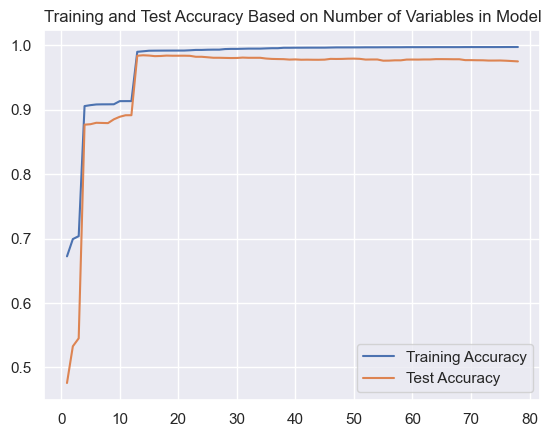

In [162]:
# Plot the accuracy of the best model for each number of variables
plt_vars_and_accuracy(train_acc, test_acc)


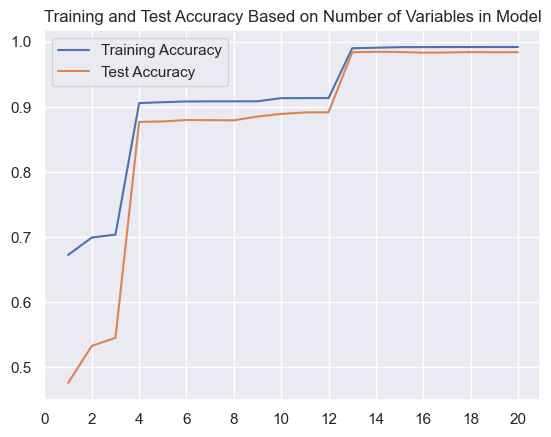

In [163]:
# Looks like there isn't much change after the teens, so let's limit the plot to the first 20 vars
first_twenty_train = {key: value for key, value in train_acc.items() if key in range(1, 21)}
first_twenty_test = {key: value for key, value in test_acc.items() if key in range(1, 21)}

plt_vars_and_accuracy(first_twenty_train, first_twenty_test, xticks=np.arange(0,21,2))


In [164]:
# Although RFE found our most accurate model to have 14 vars, we can obtain a more parsimonious model with 13 vars
# There is a big jump from 12 to 13, but after that, the training and test accuracy flatten out signaling potential overfitting
# Let's take a look at these 13 features
X = df.loc[:, variables]
y = df.loc[:, target_col]
rfe_reg = LinearRegression()
rfe = RFE(rfe_reg, n_features_to_select=13)
X_rfe = rfe.fit_transform(X,y)
rfe_reg.fit(X, y)
rfe_vars = X.columns[rfe.support_]
print(rfe_vars)

Index(['HDI', 'Average annual HDI growth 1990-2000',
       'Average annual HDI growth 1990-2015', 'Gender Development Index value',
       'Human Development Index (HDI) Female',
       'Human Development Index (HDI) Male',
       'Total fertility rate (birth per woman) 2000/2005',
       'Total fertility rate (birth per woman) 2000/2007',
       'Inequality-adjusted HDI (IHDI)', 'Coefficient of human inequality',
       'Inequality-adjusted life expectancy index',
       'Inequality-adjusted education index',
       'Inequality-adjusted income index'],
      dtype='object')


In [165]:
# These variables don't appear to be ones that our company influence with education programs
# We'll finish calculating the slopes for each variable just to see the impact they have on infant mortality

X_train, X_test, y_train, y_test = train_test_split(X.loc[:, rfe_vars],y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
train_slopes = dict(zip(rfe_vars, model.coef_))
print("score: ", model.score(X_train,y_train))
print("Model slope: ", train_slopes)
print("Model intercept: ", model.intercept_)

y_pred = model.predict(X_test)
print("score: ", model.score(X_test,y_test))


score:  0.9106279008640464
Model slope:  {'HDI': -45.848784273706215, 'Average annual HDI growth 1990-2000': -2.273421990453641, 'Average annual HDI growth 1990-2015': 3.875629206440517, 'Gender Development Index value': -200.26805568643627, 'Human Development Index (HDI) Female': 272.016993753101, 'Human Development Index (HDI) Male': -198.0074979078514, 'Total fertility rate (birth per woman) 2000/2005': 0.044124566916540445, 'Total fertility rate (birth per woman) 2000/2007': 2.1431190316696913, 'Inequality-adjusted HDI (IHDI)': 34.56209095650832, 'Coefficient of human inequality': 0.5948102276127073, 'Inequality-adjusted life expectancy index': -90.77496488102177, 'Inequality-adjusted education index': -7.40449964035075, 'Inequality-adjusted income index': 11.22248523741083}
Model intercept:  219.64676639925588
score:  0.8898479257917163


In [166]:
# We'll now repeat the same feature selection and regression process, but we are going to reduce ares potential independent variables
# We're limiting are variables to ones we believe our company can build training programs around to help countries with high mortality rates

potential_vars = ['Mean years of schooling',
                  'Mean years of schooling Female',
                  'Mean years of schooling Male',
                  'Share of seats in parliament (% held by women)',
                  'Population with at least some secondary education % (2005-2015) Female',
                  'Population with at least some secondary education % (2005-2015) Male',
                  'Labour force participation rate (% ages 15 and older) Female ',
                  'Infants exclusively breastfed (% ages 0–5 months) 2010-2015',
                  'Infants lacking immunization DTP (% of one-year-olds)',
                  'Infants lacking immunization Measles (% of one-year-olds)',
                  'Child malnutrition Stunting (moderate or severe) 2010-2015',
                  'Deaths due to Malria (per 100,000 people) ',
                  'Deaths due to Tuberculosis (per 100,000 people) ',
                  'HIV prevalence, adult (% ages 15–49)',
                  'Physicians  (per 10,000 people) 2001-2014',
                  'Public health expenditure (% of GDP) 2014',
                  'Employment to population ratio (% ages 15 and older) ',
                  'Labour force participation rate (% ages 15 and older)',
                  'Employment in agriculture (% of total employment) 2010-2014',
                  'Employment in services (% of total employment) 2010- 2014',
                  'Total Unemployment (% of labour force) 2015',
                  'Unemployment Youth (% ages 15-24) 2010-2014',
                  'Unemployment Youth not in school or employment (% ages 15-24) 2010-2014',
                  'Child labour  (% ages 5-14) 2009-2015',
                  'Mandatory paid maternity leave (days)',
                  'Old-age pension recipients  (% of statutory pension age population) 2004-2013',
                  'Inequality in education(%)',
                  'Inequality in income (%)']

nop, best_acc, train_acc, test_acc = feature_selection(df, potential_vars, target_col)
print(nop)
print(best_acc)
print(train_acc)
print(test_acc)

21
0.7412335444369444
{1: 0.600529656505602, 2: 0.6039568804845877, 3: 0.6132679982624649, 4: 0.6345506141091892, 5: 0.7034150496115474, 6: 0.7614643952320592, 7: 0.7657120933727262, 8: 0.8242622150573593, 9: 0.8264050590758569, 10: 0.8299724380055709, 11: 0.8379636415213703, 12: 0.8380014621237885, 13: 0.8394469737952067, 14: 0.8412557004290863, 15: 0.8455613726047457, 16: 0.8537536915679331, 17: 0.8537621899174624, 18: 0.8562104066017155, 19: 0.8568674049571977, 20: 0.8571881560460296, 21: 0.8662720894920811, 22: 0.8676035176557564, 23: 0.8679403414142035, 24: 0.8680440157107594, 25: 0.8680445645453836, 26: 0.8684009366542509, 27: 0.8686772865675864, 28: 0.8686793856305804}
{1: 0.48613309190616416, 2: 0.49944996934553065, 3: 0.521344547308344, 4: 0.5245871605889638, 5: 0.559444166833402, 6: 0.605299469455602, 7: 0.6143373435957044, 8: 0.7053713704152955, 9: 0.7019437994951071, 10: 0.7078401266572678, 11: 0.7223932174559087, 12: 0.7211569768846156, 13: 0.7094949361139786, 14: 0.707004

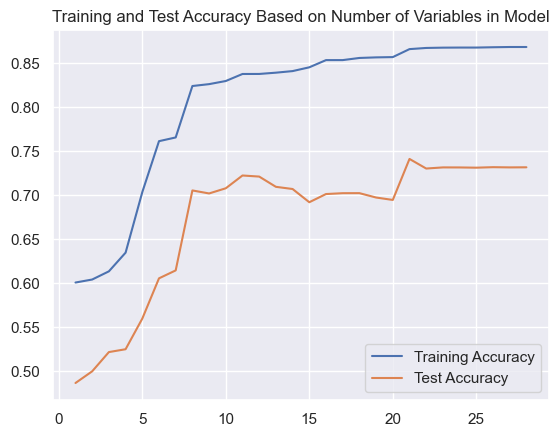

In [167]:
# Plot the accuracy of the best model for each number of variables
plt_vars_and_accuracy(train_acc, test_acc)


In [168]:
# Our best test accuracy is with 21 variables, but it isn't much higher than our accuracy with 8 vars, so let's use 8
X = df.loc[:, potential_vars]
y = df.loc[:, target_col]
rfe_reg = LinearRegression()
rfe = RFE(rfe_reg, n_features_to_select=8)
X_rfe = rfe.fit_transform(X,y)
rfe_reg.fit(X, y)
rfe_vars = X.columns[rfe.support_]
print(rfe_vars)

Index(['Mean years of schooling', 'Mean years of schooling Female',
       'Mean years of schooling Male',
       'Infants lacking immunization DTP (% of one-year-olds)',
       'HIV prevalence, adult (% ages 15–49)',
       'Public health expenditure (% of GDP) 2014',
       'Labour force participation rate (% ages 15 and older)',
       'Child labour  (% ages 5-14) 2009-2015'],
      dtype='object')


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, rfe_vars],y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
train_slopes = dict(zip(rfe_vars, model.coef_))
print("score: ", model.score(X_train,y_train))
print("Model slope: ", train_slopes)
print("Model intercept: ", model.intercept_)

y_pred = model.predict(X_test)
print("score: ", model.score(X_test,y_test))

score:  0.7669892875709067
Model slope:  {'Mean years of schooling': -5.432209560797495, 'Mean years of schooling Female': -2.1860125005142863, 'Mean years of schooling Male': 4.873023232469846, 'Infants lacking immunization DTP (% of one-year-olds)': 0.7351137031038769, 'HIV prevalence, adult (% ages 15–49)': 0.8023674245499092, 'Public health expenditure (% of GDP) 2014': -0.7268162946799039, 'Labour force participation rate (% ages 15 and older)': -0.022847808619322153, 'Child labour  (% ages 5-14) 2009-2015': 0.5789749370094871}
Model intercept:  32.51281585856792
score:  0.6890035953129969


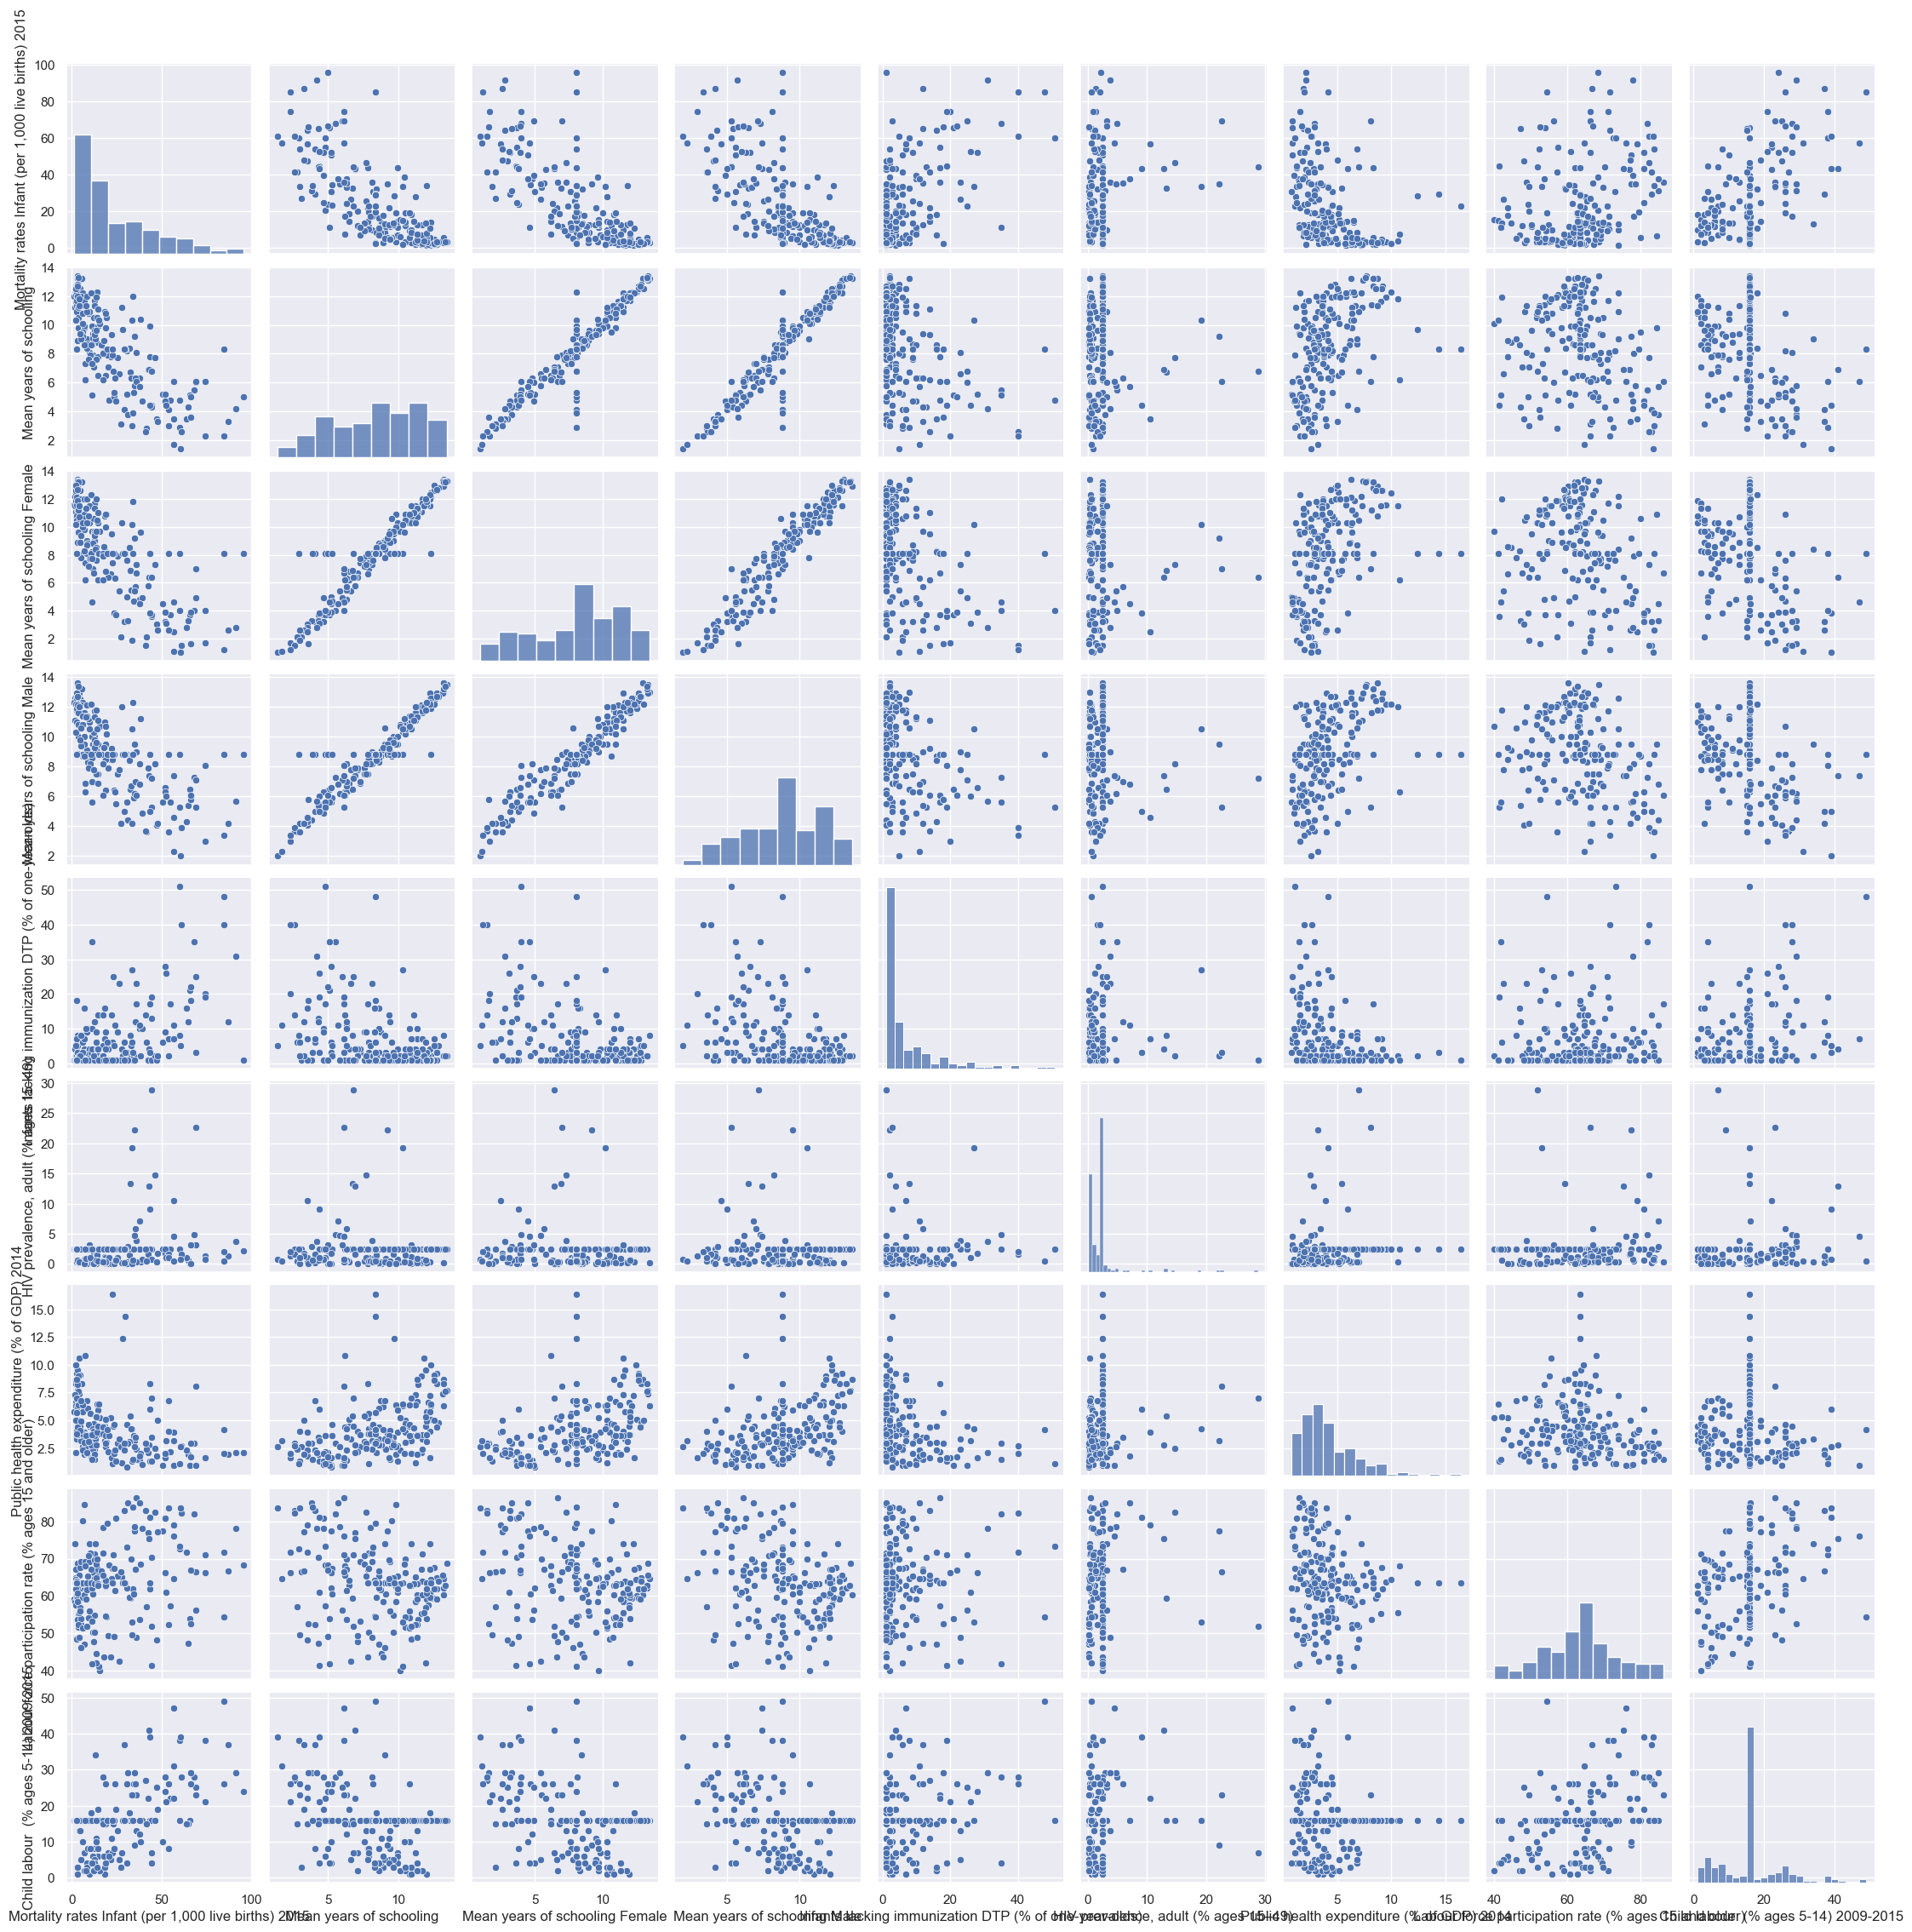

In [170]:
sns.set()
cols = rfe_vars.insert(0, target_col)
sns.pairplot(df[cols], height=2.5)
plt.show()

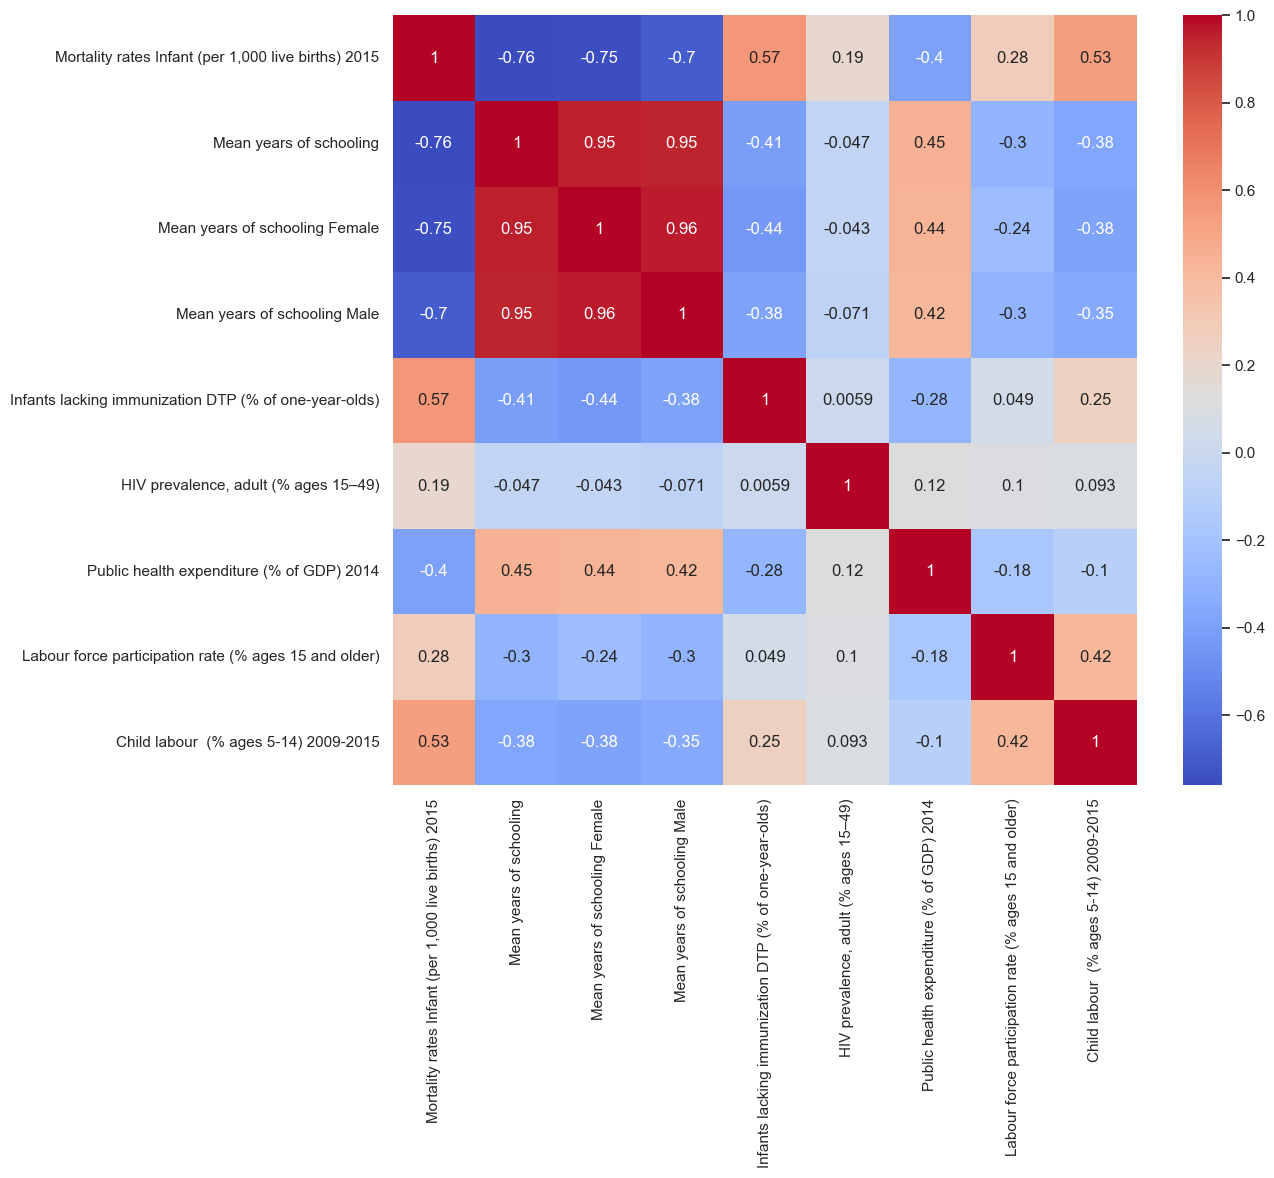

In [171]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = df.loc[:,cols].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)
plt.show()

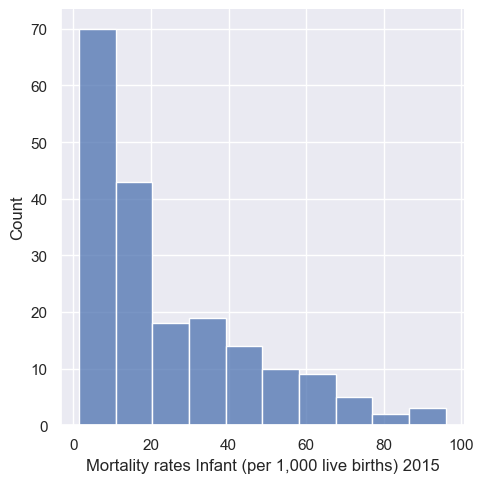

In [172]:
sns.displot(df[target_col])


In [173]:
# We want to evaluate how changing some of the identified variables can impact mortality rate on countries with the highest infant mortality rates
# We're going to recreate our data frame again, but we're going to drop any records that are missing values in our feature set instead of replacing with mean values

df_no_sub = pd.read_csv('./input/HDI.csv')

# See if any countries are missing our target field, which is infant mortality
columns = df.columns.values.tolist()
target_col = 'Mortality rates Infant (per 1,000 live births) 2015'
target_index = columns.index(target_col)
missing_target = df[df[target_col].isna()]
if not missing_target.empty:
    print('The following countries are missing infant mortality rates and will be removed from our dataset:')
    print(missing_target[['Country']])
    df = df.dropna(subset=[target_col])
else:
    print('All countries in the dataset have information on the target value.')

# Drop all countries who are missing values related to the rfe selected vars
df_no_sub = df_no_sub.dropna(subset=rfe_vars)
df_no_sub.describe()


All countries in the dataset have information on the target value.


,Unnamed: 0,Id,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
count,84.00000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,73.000000,...,79.000000,84.000000,84.000000,81.000000,81.000000,80.000000,80.000000,71.000000,71.000000,71.000000
mean,122.22619,123.22619,123.059524,0.620405,67.405952,6.997619,7924.154762,1.880952,0.309524,0.856849,...,25.073418,22.794048,0.576000,25.327160,0.437963,27.241250,0.427200,9.518310,2.278873,41.614085
std,42.05858,42.05858,42.102386,0.134726,8.044520,2.806317,6586.804347,18.037715,3.821235,0.932954,...,8.661242,11.412352,0.170431,13.685229,0.183893,10.391643,0.124217,5.143965,1.108270,8.443819
min,37.00000,38.00000,38.000000,0.352000,48.900000,1.400000,587.000000,-79.000000,-12.000000,-1.390000,...,6.400000,5.800000,0.263000,2.200000,0.134000,8.900000,0.136000,3.300000,0.800000,24.100000
25%,86.75000,87.75000,87.000000,0.493750,61.100000,4.700000,2287.500000,-7.000000,-1.250000,0.410000,...,18.350000,13.350000,0.422500,13.600000,0.273000,20.375000,0.334500,5.450000,1.400000,34.650000
50%,122.50000,123.50000,123.500000,0.646000,69.600000,7.000000,6519.500000,3.500000,0.000000,0.900000,...,25.400000,19.650000,0.620500,24.400000,0.429000,27.400000,0.415500,8.400000,2.100000,42.200000
75%,161.25000,162.25000,162.250000,0.740000,74.450000,9.050000,12899.500000,13.250000,3.000000,1.420000,...,32.150000,33.200000,0.724000,36.900000,0.586000,34.100000,0.503750,11.200000,2.850000,47.650000
max,187.00000,188.00000,188.000000,0.847000,82.000000,12.200000,28049.000000,38.000000,8.000000,3.630000,...,43.100000,46.200000,0.881000,48.300000,0.804000,55.500000,0.712000,32.500000,6.500000,60.800000


In [174]:
# Let's identify some candidate countries that our organization can help
# We'll do this by looking at the highest mortality rates countries that have all feature data available

candidates = df_no_sub.nlargest(10, target_col)
print(candidates.loc[:, ['Country', target_col]])

# Limit down to features, target, and country name
candidate_cols = rfe_vars.insert(0, target_col)
candidate_cols = candidate_cols.insert(0, 'Country')
candidates = candidates.loc[:, candidate_cols]

candidates.describe()

                                Country  \
187            Central African Republic   
179                        Sierra Leone   
185                                Chad   
174                                Mali   
175  Congo (Democratic Republic of the)   
151                             Nigeria   
160                             Lesotho   
135                   Equatorial Guinea   
170                       Côte d'Ivoire   
168                         Afghanistan   

     Mortality rates Infant (per 1,000 live births) 2015  
187                                               91.5    
179                                               87.1    
185                                               85.0    
174                                               74.5    
175                                               74.5    
151                                               69.4    
160                                               69.2    
135                                               68.2

,"Mortality rates Infant (per 1,000 live births) 2015",Mean years of schooling,Mean years of schooling Female,Mean years of schooling Male,Infants lacking immunization DTP (% of one-year-olds),"HIV prevalence, adult (% ages 15–49)",Public health expenditure (% of GDP) 2014,Labour force participation rate (% ages 15 and older),Child labour (% ages 5-14) 2009-2015
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,75.230000,4.440000,3.37000,5.600000,22.500000,4.310000,2.570000,67.790000,28.20000
std,9.286316,1.513054,1.76827,1.677962,10.906165,6.625783,2.033634,8.841248,5.51362
min,66.300000,2.300000,1.20000,3.000000,3.000000,0.100000,0.900000,52.500000,21.00000
25%,68.450000,3.375000,1.92500,4.475000,18.250000,1.300000,1.625000,66.250000,25.25000
50%,71.950000,4.600000,3.35000,5.750000,21.000000,2.550000,1.950000,66.900000,27.00000
75%,82.375000,5.875000,4.00000,6.850000,29.500000,3.575000,2.700000,71.475000,29.00000
max,91.500000,6.100000,7.00000,8.100000,40.000000,22.700000,8.100000,82.000000,38.00000


In [175]:
# Get world averages from original df
world_avg = df[rfe_vars].mean(axis=0)
print(world_avg)


Mean years of schooling                                   8.332258
Mean years of schooling Female                            8.075595
Mean years of schooling Male                              8.814881
Infants lacking immunization DTP (% of one-year-olds)     6.818653
HIV prevalence, adult (% ages 15–49)                      2.447170
Public health expenditure (% of GDP) 2014                 4.181053
Labour force participation rate (% ages 15 and older)    63.527374
Child labour  (% ages 5-14) 2009-2015                    15.830357
dtype: float64


In [176]:
world_avg[0]

8.33225806451612

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


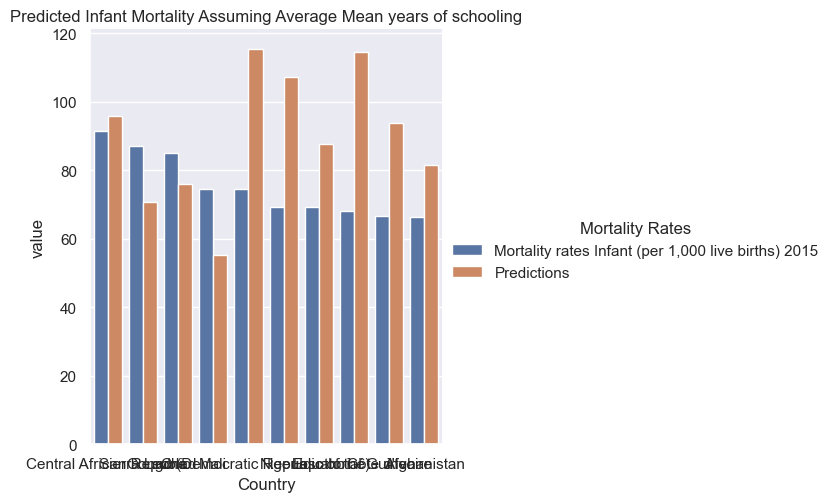

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


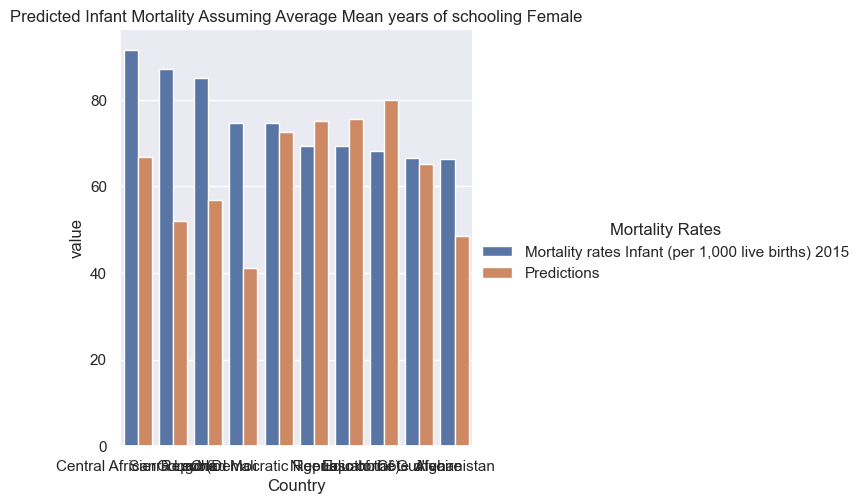

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


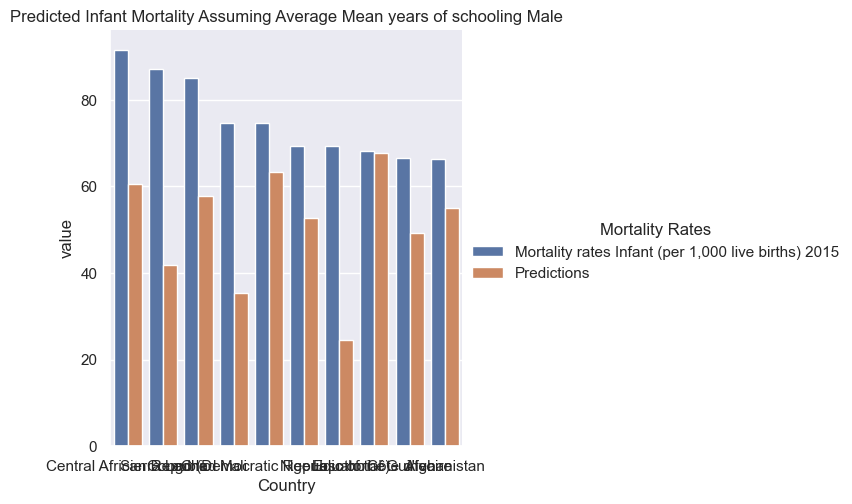

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


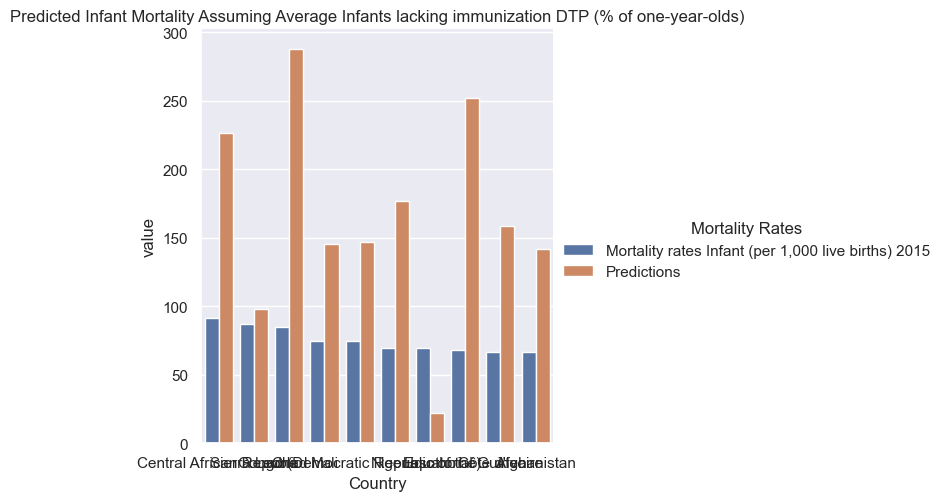

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


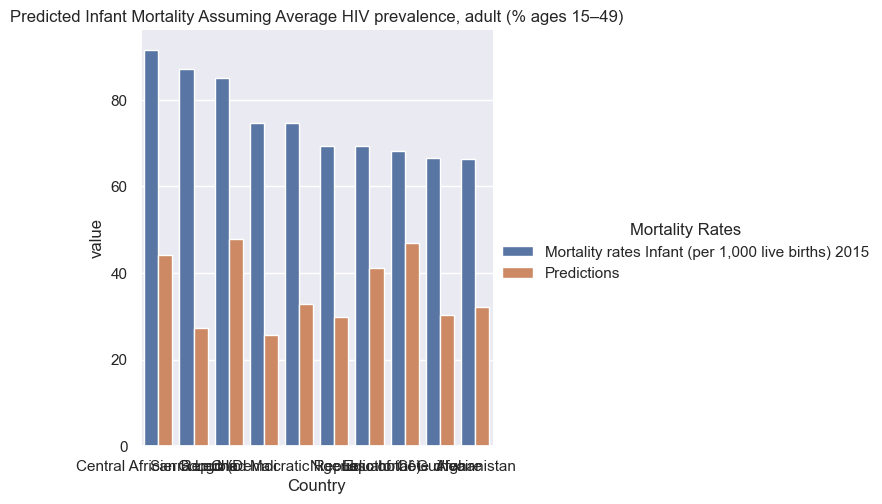

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


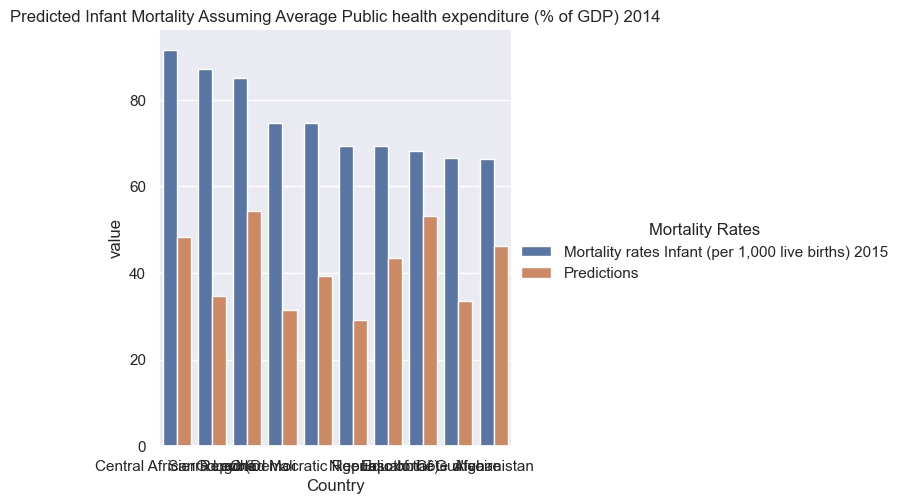

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


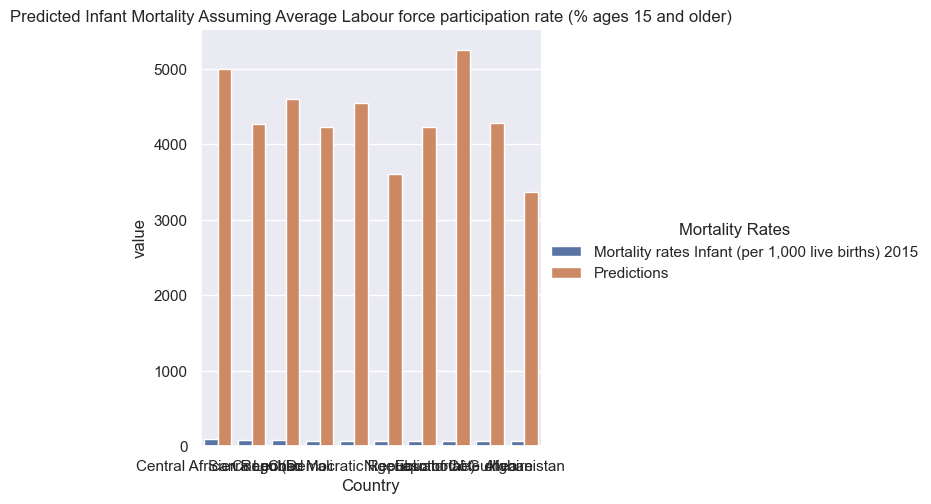

C:\Users\knzga\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


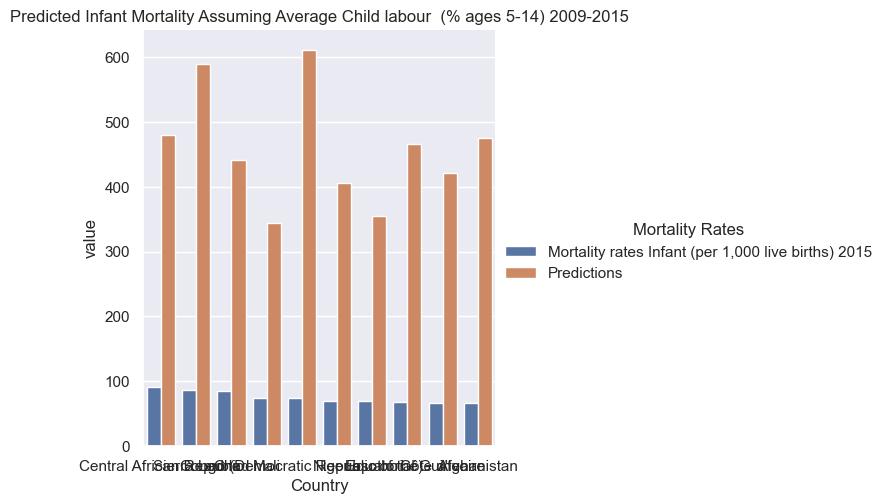

In [177]:
def plot_bar_chart(df):
    df_melt = pd.melt(df, id_vars='Country')
    df_melt = df_melt.rename(columns={"variable": "Mortality Rates"})
    sns.factorplot(x = 'Country', y = 'value',
                   hue='Mortality Rates', data=df_melt, kind='bar')
    plt.title("Predicted Infant Mortality Assuming Average " + str(feature))
    plt.show()

def prep_for_bar_plot(df, avgs, feature, target, slopes):
    current_pred = df.loc[:, ['Country', target]] # Table with country name, current mortality, adding projected mortality
    predictions = {} # Predicted mortality rates with world average of feature

    for country in df['Country']:
        estimate = 0
        country_stats = df[df['Country'] == country]
        country_stats = country_stats.drop(['Country', target], axis=1) # Drop non-features
        country_stats = country_stats.to_dict(orient='records')[0] # Turn into dict for loooping

        # If the slope corresponds to the feature in question, use worldwide average to calc prediction
        # Otherwise use that countries value for the feature
        for key, value in slopes.items():
            if key == feature:
                estimate += avgs[feature] * country_stats[key]
            else:
                estimate += value * country_stats[key]

        # Add the countries predicted mortality to the dictionary
        predictions[country] = estimate

    current_pred['Predictions'] = df['Country'].map(predictions)
    return current_pred


for feature in rfe_vars:
    data_to_plot = prep_for_bar_plot(candidates, world_avg, feature, target_col, train_slopes)
    plot_bar_chart(data_to_plot)
